In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import mymodule as mm

Report written by Christian Emil Lorentsen, stz166 \
I have worked with Rasmus Madsen


$\Large{Question \ 1a}$ \
$\cdot$ Start by defining  $N\times N$ array with inputs d. \
$\cdot$ Define a while loop, that iterates when the system hasn’t been cleaned. \
$\cdot$ Make the RVC move in a snake-like fashion, where it “cleans” the grid.

$\Large{Question \ 1b}$ \
$\text{See Mymodule.py}$

$\Large{Question \ 1c}$

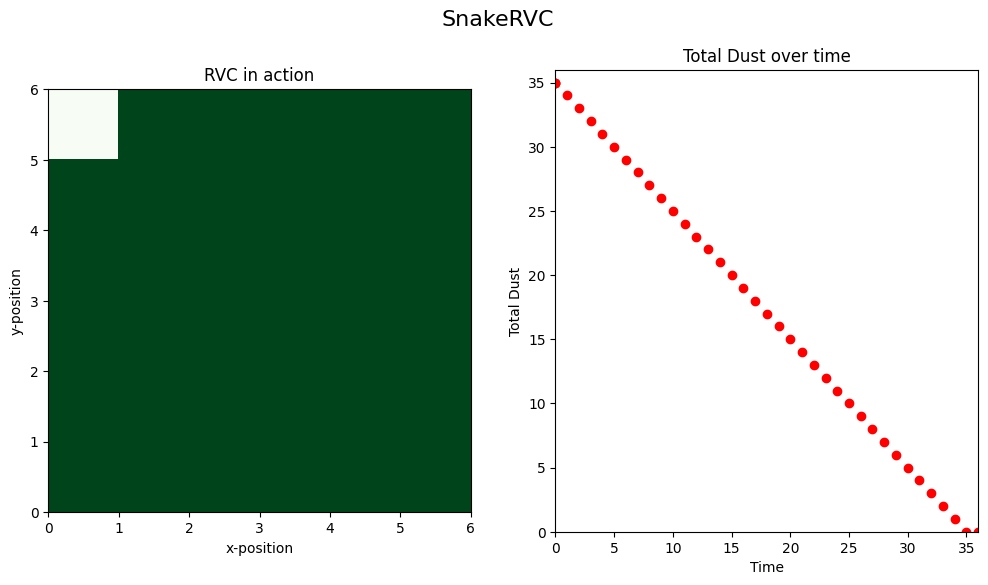

In [2]:
N, d = 6, 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

a = mm.SnakeBot(Grid = np.ones((N,N))*d, Tmax = 0, eff = 1, d = 1, N = 6, drmax = 1, Room = 0).SnakeRVC()
im = ax1.imshow(a, cmap='Greens', vmin = 0, vmax = d, extent=[0, N, 0, N])


def animatesnake_func(i): #I just run the Snakebot function with increasing Tmax values for the frames
    im.set_array(mm.SnakeBot(np.ones((N,N))*d, Tmax = i, eff = 1, N = N , d = d, drmax = 1, Room = 0).SnakeRVC())
    ax2.plot(i, mm.SnakeBot(np.ones((N,N))*d, Tmax = i, eff = 1, N = N, d = d, drmax = 1, Room = 0).SnakeRVC().sum(), 'ro')
    return [im]


fig.suptitle('SnakeRVC', fontsize=16)
ax1.set_title('RVC in action')
ax1.set_xlabel('x-position')
ax1.set_ylabel('y-position')
ax2.set_title('Total Dust over time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Total Dust')
ax2.set_xlim([0, N**2])
ax2.set_ylim([0, N**2])


anim = animation.FuncAnimation(fig, animatesnake_func, frames=N**2+1, interval=1000/5)
anim.save('SnakeRVC.mp4', fps=5, extra_args=['-vcodec', 'libx264'])


Since the RVC cleans one new tile at each timestep, we expect the total dust to decline linearly, which we observe.
Actually the dust decreases with $-eff \cdot t$ , which we will observe later

$\Large{Question \ 2a}$ \
$\cdot$ Using numpy's random number generating function, i will at each timestep update the RVC's position. Since the RVC moves a distance dr (i call it drmax), i will calculate a random angle theta, and convert from polar to cartesian coordinates \
$\cdot$ After updating the position, i will check if it is outside the boundary condition, and update it's position back inside the boundary, if it is. \
$\cdot$ When i have an array of all the positions, i will clean the grid at each position


$\Large{Question \ 2b}$ 

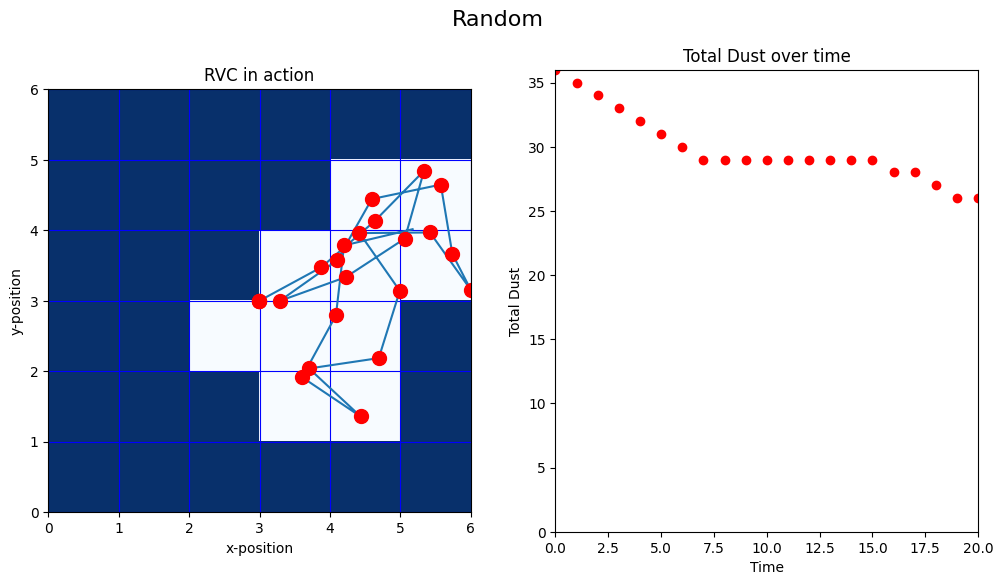

In [3]:
Tmax, eff, N, d, drmax = 20, 1, 6, 1, 1
Grid = np.ones((N,N))*d

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

Bot = mm.RandoBot(Grid = Grid, Tmax = Tmax, eff = eff, N = N, d = d, drmax = drmax, Room = 0)
Path = Bot.RandomPath()
A = mm.RandomRVC(RVCX = Path[0], RVCY = Path[1], Grid = Grid, Tmax = Tmax, eff = eff, N = N, d = d)
#A is a "3D" array (a list of the grids at each time step), which is easier to animate

ax1.plot(Path[0], Path[1])
im = ax1.imshow(A[0], cmap='Blues', vmin = 0, vmax = d, extent=[0, N, 0, N])
def init():
    im
    ax1.plot(Path[0][0],Path[1][0], 'ro', markersize = 10)

def animaterandom_func(i):
    im.set_array(A[i])
    ax2.plot(i, A[i].sum(), 'ro')
    ax1.plot(Path[0][i], Path[1][i], 'ro', markersize = 10)
    return [im]

fig.suptitle('Random', fontsize=16)
ax1.set_title('RVC in action')
ax1.set_xlabel('x-position')
ax1.set_ylabel('y-position')
ax1.grid(color = 'blue')
ax2.set_title('Total Dust over time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Total Dust')
ax2.set_xlim([0, Tmax])
ax2.set_ylim([0, N**2])

anim = animation.FuncAnimation(fig, animaterandom_func, frames=Tmax+1, interval=1000/5, init_func=init)
anim.save('RandomRVC.mp4', fps=5, extra_args=['-vcodec', 'libx264'])


$\Large{Question \ 2c}$ 


In [4]:
N, d, drmax = 7, 1, 1
Tmax = N**2*2
Efficiency = [1, 0.5, 0.3, 0.1]
for eff in Efficiency: #I run the function for each effeciency and 30 times for random run
    A = []
    for i in range(30):
        Grid = np.ones((N,N))*d
        Bot = mm.RandoBot(Grid = Grid, Tmax = Tmax, eff = eff, N = N, d = d, drmax = drmax, Room = 0)
        Path = Bot.RandomPath()
        A.append(mm.QuickRandomRVC(RVCX = Path[0], RVCY = Path[1], Grid = Grid, Tmax = Tmax, eff = eff, N = N, d = d))
    B = [] 
    for Tmax in range(Tmax+1):
        B.append(mm.SnakeBot(np.ones((N,N))*d, Tmax = Tmax, eff = eff, N = N , d = d, drmax = drmax, Room = 0).SnakeRVC().sum())

    np.savetxt("RandomRVCeff"+str(eff)+".csv", np.array(A), delimiter=",", 
            header = "RandomRVC with Efficiency = "+str(eff)+"and N, d, drmax, Tmax = "+str(N)+", "+str(d)+", "+str(drmax)+", "+str(Tmax))
    np.savetxt("SnakeRVCeff"+str(eff)+".csv", np.array(B), delimiter=",", 
            header = "SnakeRVC with Efficiency = "+str(eff)+"and N, d, drmax, Tmax = "+str(N)+", "+str(d)+", "+str(drmax)+", "+str(Tmax))


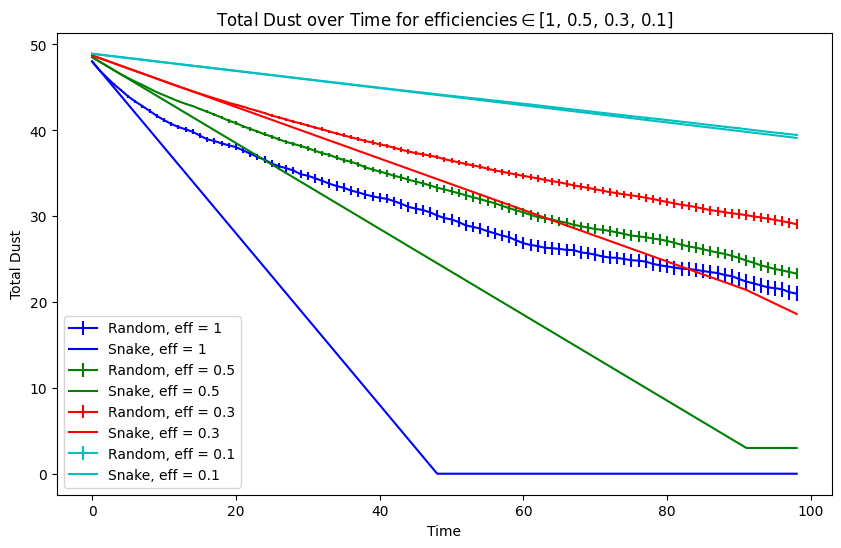

In [5]:
figure = plt.figure(figsize = (10,6))
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for eff in Efficiency: #I use the SEMfunc to get the means and standard error of the means for each efficiency 
    RandomErr, Random, SnakeData = mm.SEMfunc(eff)
    plt.errorbar(range(len(Random)), Random, yerr = RandomErr, label = 'Random, eff = '+str(eff), color = color[Efficiency.index(eff)])
    plt.errorbar(range(len(SnakeData)), SnakeData, label = 'Snake, eff = '+str(eff), color = color[Efficiency.index(eff)])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Total Dust')
plt.title('Total Dust over Time for efficiencies$\in$'+str(Efficiency))
plt.show()

Random Cleaning isn't better than ordered, since the ordered RVC always step into an uncleaned tile (unless everything has bee cleaned), while the random RVC might step into a tile that has already been cleaned. This effect isn't as clear when the efficiency of the RVC's are low, since the random RVC almost always steps into a tile, that hasn't been cleaned
This effect is clear comparing the lines for eff = 1 and eff = 0.1, where they lie basically identically for eff = 0.1, and the SEM's are almost unnoticable, while at eff = 1, the random cleaning almost stagnates at the end.
We also observe that for the ordered cleaning, the dust decreases with $-eff \cdot t$, which is what we expected.

$\Large{Question \ 3a \ Intermediate}$ \
I started running into problems with the ordered RVC. I couldn't seem to figure out how to make it avoid the obstacles, so i made the intermediate assigment from here, with stuff from the advanced.
Modifying the Random RVC was surprisingly easy, as i just had to add another constraint, which is quite similar to the boundary condition.

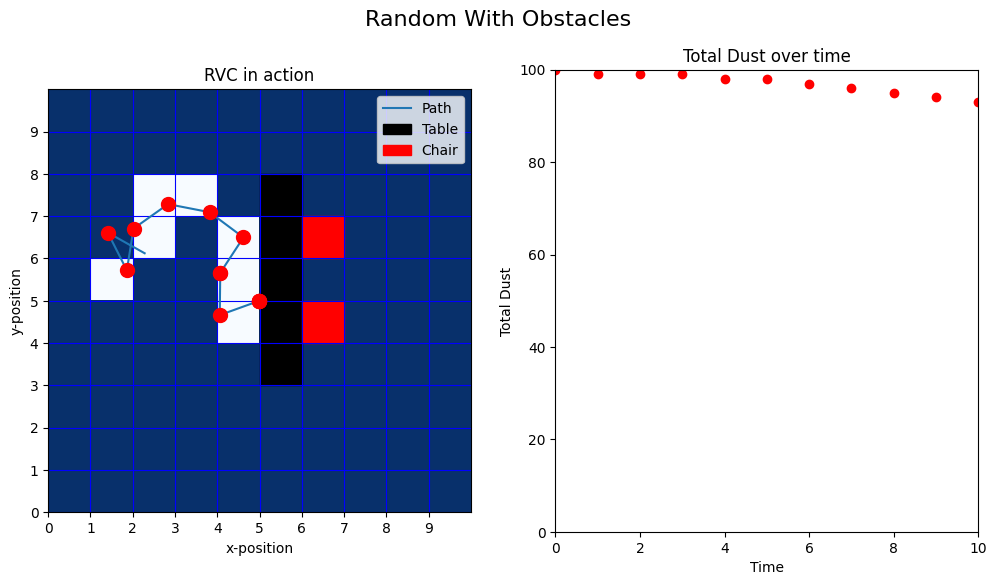

In [6]:
from matplotlib.patches import Rectangle
#Pretty much the same as the random run, but with obstacles
#The code is pretty slow with a 10x10 grid, therefore the low Tmax
Tmax, eff, d, drmax = 10, 1, 1, 1
Room = np.genfromtxt("room_config.txt")
N = len(Room[0])
Grid = np.ones((N,N))*d


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
Bot = mm.RandoBot(Grid = Grid, Tmax = Tmax, eff = eff, N = N, d = d, drmax = drmax, Room = Room)
Path = Bot.RandomPath()
A = mm.RandomRVC(RVCX = Path[0], RVCY = Path[1], Grid = Grid, Tmax = Tmax, eff = eff, N = N, d = d)

ax1.plot(Path[0], Path[1], label = 'Path')
im = ax1.imshow(A[0], cmap='Blues', vmin = 0, vmax = d, extent=[0, N, 0, N])
def init():
    im
    ax1.plot(Path[0][0],Path[1][0], 'ro', markersize = 10, label = "RVC")
    

def animaterandom_func(i):
    im.set_array(A[i])
    
    ax2.plot(i, A[i].sum(), 'ro')
    ax1.plot(Path[0][i], Path[1][i], 'ro', markersize = 10, label = "RVC")
    return [im]

fig.suptitle('Random With Obstacles', fontsize=16)

counter1, counter2 = 0, 0
for i in range(len(Room)): #Here I plot the obstacles
    for j in range(len(Room)):
        if Room[i][j] == 1:
            ax1.add_patch(Rectangle((j, i), 1, 1, fill=True, color='black', label = "Table" if counter1 == 0 else ""))
            counter1 = 1
        if Room[i][j] == 2:
            ax1.add_patch(Rectangle((j, i), 1, 1, fill=True, color='red', label = "Chair" if counter2 == 0 else ""))
            counter2 = 1


ax1.set_title('RVC in action')
ax1.set_xlabel('x-position')
ax1.set_ylabel('y-position')
ax1.set_xticks(np.arange(0, N, 1))
ax1.set_yticks(np.arange(0, N, 1))
ax1.grid(color = 'blue')
ax1.legend()
ax2.set_title('Total Dust over time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Total Dust')
ax2.set_xlim([0, Tmax])
ax2.set_ylim([0, N**2])

anim = animation.FuncAnimation(fig, animaterandom_func, frames=Tmax+1, interval=1000/5, init_func=init)
anim.save('RandomRVCObstacle.mp4', fps=5, extra_args=['-vcodec', 'libx264'])


This is were i went wrong in the ordered case.

2
2
(array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1.]]), [0, 0, 1, 2, 3, 4, 4, 3, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 3, 3, 3, 4, 4, 3], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 2, 3, 3], 3, 2)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


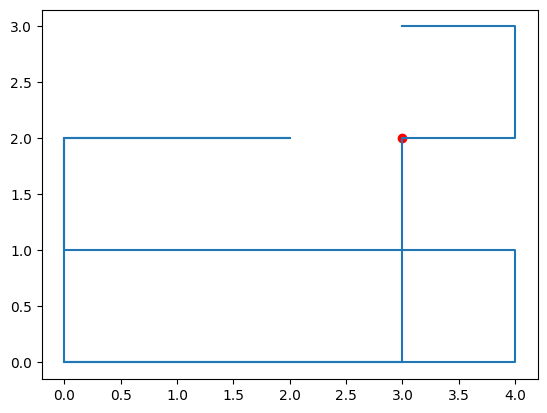

In [7]:
# Room = np.genfromtxt("room_config.txt")
Room = np.zeros((5,5))
Room[2][2] = 1

Tmax, eff, d, drmax = 100, 1, 1, 1
N = len(Room[0])
Grid = np.ones((N,N))*d


bot = mm.SnakeBot(Grid = Grid, Tmax = Tmax, eff = 1, d=1, N=N, drmax = 1, Room = Room)
A = bot.SnakeRVCObstacle()
print(A)
print(Room)
plt.plot(A[1], A[2])
plt.scatter(A[3], A[4], color = 'red')


$\Large{Question \ 3b \ Intermediate}$ \
Here i pretty much did the same as in 2c, although i changed the plots, so they wouldn't be too confusing

In [8]:
d, drmax = 1, 1
Room = np.genfromtxt("room_config.txt")
N = len(Room[0])
Grid = np.ones((N,N))*d
Tmax = N**2
Efficiency = [1, 0.5, 0.3, 0.1]

for eff in Efficiency:
    A = []
    for i in range(10):
        Bot = mm.RandoBot(Grid = Grid, Tmax = Tmax, eff = eff, N = N, d = d, drmax = drmax, Room = 0)
        Path = Bot.RandomPath()
        A.append(mm.QuickRandomRVC(RVCX = Path[0], RVCY = Path[1], Grid = np.ones((N,N))*d, Tmax = Tmax, eff = eff, N = N, d = d))
    B = [] 
    for Tmax in range(Tmax+1):
        B.append(mm.SnakeBot(np.ones((N,N))*d, Tmax = Tmax, eff = eff, N = N , d = d, drmax = drmax, Room = 0).SnakeRVC().sum())
    C = []
    for i in range(10):
        Bot = mm.RandoBot(Grid = Grid, Tmax = Tmax, eff = eff, N = N, d = d, drmax = drmax, Room = Room)
        Path = Bot.RandomPath()
        # print(Path[0], Path[1]) if i == 0 and eff == Efficiency[0] else None
        C.append(mm.QuickRandomRVC(RVCX = Path[0], RVCY = Path[1], Grid = np.ones((N,N))*d, Tmax = Tmax, eff = eff, N = N, d = d))
        # F = [Path[0], Path[1]] if i == 0 and eff == Efficiency[0] else F
    np.savetxt("RandomRVCeff"+str(eff)+"N"+str(N)+".csv", np.array(A), delimiter=",", 
            header = "RandomRVC with Efficiency = "+str(eff)+"and N, d, drmax, Tmax = "+str(N)+", "+str(d)+", "+str(drmax)+", "+str(Tmax))
    np.savetxt("SnakeRVCeff"+str(eff)+"N"+str(N)+".csv", np.array(B), delimiter=",", 
            header = "SnakeRVC with Efficiency = "+str(eff)+"and N, d, drmax, Tmax = "+str(N)+", "+str(d)+", "+str(drmax)+", "+str(Tmax))
    np.savetxt("RandomRVCObstacleeff"+str(eff)+"N"+str(N)+".csv", np.array(C), delimiter=",",
            header = "SnakeRVC with Efficiency = "+str(eff)+"and N, d, drmax, Tmax = "+str(N)+", "+str(d)+", "+str(drmax)+", "+str(Tmax))
# print(F)

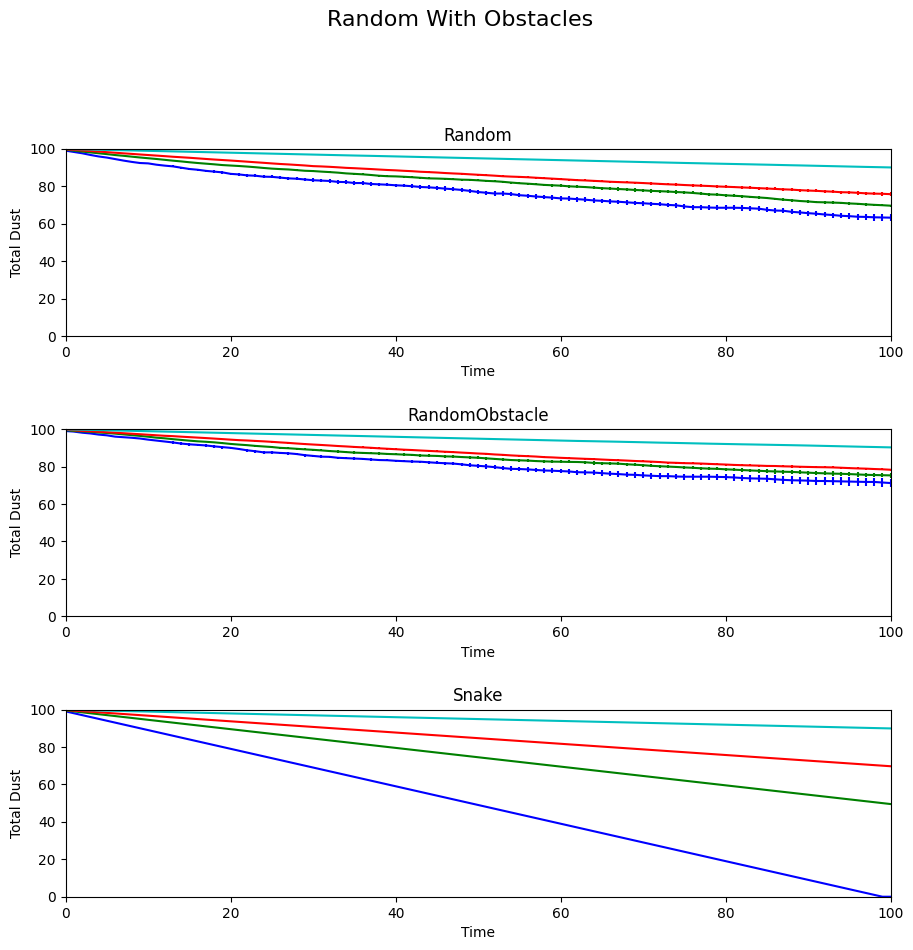

In [9]:
fig, axs = plt.subplots(3, 1, figsize = (10,10))
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
EndValues = []
for eff in Efficiency:
    RandomErr, Random, RandomErrObstacle, RandomObstacle, SnakeData = mm.SEMfuncObstacle(eff, N)
    EndValues.append([RandomErr[-1], Random[-1], RandomErrObstacle[-1], RandomObstacle[-1], SnakeData[-1]])
    axs[0].errorbar(range(len(Random)), Random, yerr = RandomErr, label = 'Random, eff = '+str(eff), color = color[Efficiency.index(eff)])
    axs[1].errorbar(range(len(RandomObstacle)), RandomObstacle, yerr = RandomErrObstacle, label = 'RandomObstacle, eff = '+str(eff), color = color[Efficiency.index(eff)])
    axs[2].errorbar(range(len(SnakeData)), SnakeData, label = 'Snake, eff = '+str(eff), color = color[Efficiency.index(eff)])

fig.suptitle('Random With Obstacles', fontsize=16)
fig.tight_layout(pad = 5)
PlotTitles = ['Random', 'RandomObstacle', 'Snake']
for i in range(3):
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Total Dust')
    axs[i].set_title(PlotTitles[i])
    axs[i].set_xlim([0, Tmax])
    axs[i].set_ylim([0, N**2])


In [10]:
for i in range(len(EndValues)):
    for j in range(len(EndValues[i])):
        EndValues[i][j] = round(EndValues[i][j], 2)
for i in range(len(EndValues)):
    print("Efficiency = "+str(Efficiency[i])+
          ", Random = "+str(EndValues[i][1])+"+/-"+str(EndValues[i][0])+
          ", RandomObstacle = "+str(EndValues[i][3])+"+/-"+str(EndValues[i][2])+
          ", Snake = "+str(EndValues[i][4]))

Efficiency = 1, Random = 63.2+/-1.82, RandomObstacle = 71.2+/-2.27, Snake = 0.0
Efficiency = 0.5, Random = 69.6+/-0.53, RandomObstacle = 75.3+/-1.22, Snake = 49.5
Efficiency = 0.3, Random = 75.76+/-0.97, RandomObstacle = 78.31+/-0.55, Snake = 69.7
Efficiency = 0.1, Random = 90.03+/-0.07, RandomObstacle = 90.26+/-0.17, Snake = 89.9


It seems though the random and random with obstacles are pretty much the same, while the random with obstacles is slightly worse. This is caused by the RVC being "stuck" on the obstacles and it's speed is therefore decreased.

$\Large{Question \ 3b \ Advanced} $ \
Here i change the drmax, i.e. the maximum distance the RVC move each time step, which corresponds to the speed of the RVC.

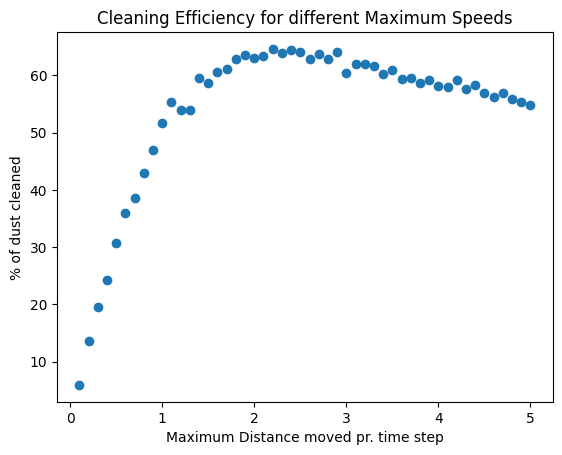

In [11]:
N, d, eff = 7, 1, 0.5
Tmax = N**2*2
MaximumDistance = np.linspace(0.1, 5, 50)
# for i in range(len(MaximumDistance)):
#     MaximumDistance[i] = int(MaximumDistance[i])
for drmax in MaximumDistance: #I run the function for each drmax and 30 times for random run
    A = []
    for i in range(30):
        Grid = np.ones((N,N))*d
        Bot = mm.RandoBot(Grid = Grid, Tmax = Tmax, eff = eff, N = N, d = d, drmax = drmax, Room = 0)
        Path = Bot.RandomPath()
        A.append(mm.QuickRandomRVC(RVCX = Path[0], RVCY = Path[1], Grid = Grid, Tmax = Tmax, eff = eff, N = N, d = d))
    np.savetxt("RandomRVCdrmax"+str(drmax)+".csv", np.array(A), delimiter=",", 
            header = "RandomRVC with Efficiency = "+str(eff)+"and N, d, drmax, Tmax = "+str(N)+", "+str(d)+", "+str(drmax)+", "+str(Tmax))

# color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
CleaningEfficiency = []
for drmax in MaximumDistance:
    RandomErr, Random = mm.SEMfuncSpeed(drmax)
    CleaningEfficiency.append((1-Random[-1]/(N**2))*100)
#I define the cleaning efficiency to be the percentage of dust cleaned   
    
plt.scatter(MaximumDistance, CleaningEfficiency)

plt.title('Cleaning Efficiency for different Maximum Speeds')
plt.xlabel('Maximum Distance moved pr. time step')
plt.ylabel('% of dust cleaned')
plt.show()

The cleaning efficiency starts by increasing (more dust cleaned), which makes sense, since the RVC is less likely to move to a new, uncleaned tile. But for larger speeds, it decreases, which is likely caused by the fact that the RVC is more likely to get "stuck" on the boundaries. Also, the RVC now "jumps" over tiles, which it would have cleaned, but doesn't in the way the code is written. 